In [1]:
from QuantLib import *

In [2]:
today = Date(7, March, 2014)
Settings_instance().evaluationDate = today

In [3]:
option = EuropeanOption(PlainVanillaPayoff(Option.Call, 100.0),
                        EuropeanExercise(Date(7, June, 2014)))

In [4]:
u = SimpleQuote(100.0)
r = SimpleQuote(0.01)
sigma = SimpleQuote(0.20)

In [5]:
riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360())
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())

In [6]:
process = BlackScholesProcess(QuoteHandle(u),
                              YieldTermStructureHandle(riskFreeCurve),
                             BlackVolTermStructureHandle(volatility))

In [7]:
engine = AnalyticEuropeanEngine(process)

In [8]:
option.setPricingEngine(engine)

In [9]:
option.NPV()

4.155543462156206

In [10]:
option.delta()

0.5302223303784392

In [11]:
option.gamma()

0.03934493301271913

In [12]:
option.vega()

20.109632428723106

In [13]:
u.setValue(105.0)

In [14]:
option.NPV()

7.27556357927846

In [20]:
%%capture
%pylab inline --no-import-all
import matplotlib.pyplot as plot
import numpy
from IPython.display import display
import utils
#utils.set_default_plot_size()

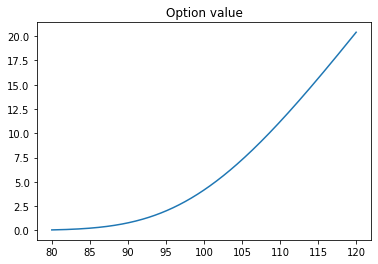

In [19]:
f, ax = plot.subplots()
xs = numpy.linspace(80.0, 120.0, 400)
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.set_title('Option value')
_ = ax.plot(xs, ys)

In [21]:
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [22]:
option.NPV()

7.27556357927846

In [23]:
r.setValue(0.03)

In [24]:
option.NPV()

7.624029148527754

In [25]:
sigma.setValue(0.25)

In [26]:
option.NPV()

8.531296969971573

In [27]:
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [28]:
option.NPV()

7.27556357927846

In [29]:
Settings.instance().evaluationDate = Date(7, April, 2014)

In [30]:
option.NPV()

6.560073820974377

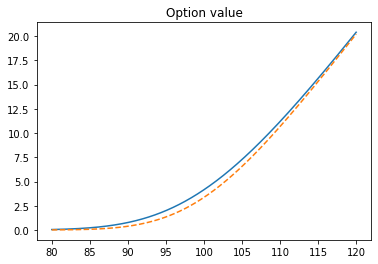

In [31]:
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.plot(xs, ys, '--')
display(f)

In [32]:
Settings.instance().evaluationDate = Date(7, June, 2014)

In [33]:
option.NPV()

0.0

In [34]:
Settings.instance().evaluationDate = today
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [35]:
option.NPV()

7.27556357927846

In [36]:
model = HestonModel(HestonProcess(YieldTermStructureHandle(riskFreeCurve),
                                 YieldTermStructureHandle(FlatForward(0, TARGET(), 0.0, Actual360())),
                                 QuoteHandle(u),
                                 0.04, 0.1, 0.01, 0.05, -0.75))

In [37]:
engine = AnalyticHestonEngine(model)
option.setPricingEngine(engine)

In [38]:
option.NPV()

7.295356086978629

In [39]:
engine = MCEuropeanEngine(process, "PseudoRandom", timeSteps=20, requiredSamples=250000)
option.setPricingEngine(engine)

In [40]:
%time option.NPV()

CPU times: user 1.41 s, sys: 0 ns, total: 1.41 s
Wall time: 1.41 s


7.2963509481370545

In [41]:
%time option.NPV()

CPU times: user 37 µs, sys: 0 ns, total: 37 µs
Wall time: 47 µs


7.2963509481370545

In [43]:
u.setValue(104.0)

In [44]:
%time option.NPV()

CPU times: user 1.41 s, sys: 0 ns, total: 1.41 s
Wall time: 1.41 s


6.574474262034217